In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_raw = pd.read_csv("data/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df_raw.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df_raw.shape

(7043, 21)

In [5]:
df_raw.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
df_raw.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [7]:
df_raw.PaperlessBilling.value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

In [8]:
df_new = df_raw.copy().rename(columns=str.lower)

In [9]:
df_new.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [10]:
df_new.internetservice.value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: internetservice, dtype: int64

In [11]:
df_new.nunique()

customerid          7043
gender                 2
seniorcitizen          2
partner                2
dependents             2
tenure                73
phoneservice           2
multiplelines          3
internetservice        3
onlinesecurity         3
onlinebackup           3
deviceprotection       3
techsupport            3
streamingtv            3
streamingmovies        3
contract               3
paperlessbilling       2
paymentmethod          4
monthlycharges      1585
totalcharges        6531
churn                  2
dtype: int64

In [12]:
df_new.multiplelines.value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: multiplelines, dtype: int64

In [13]:
df_new.internetservice.value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: internetservice, dtype: int64

gender


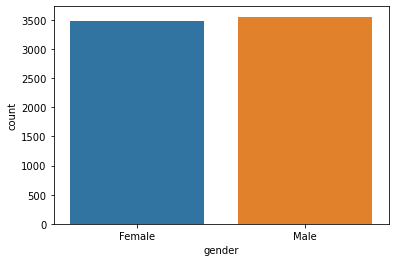

partner


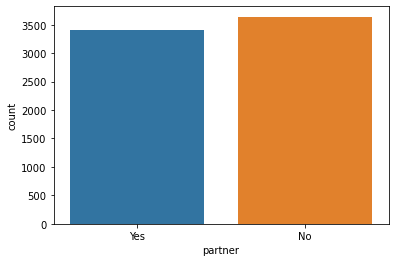

dependents


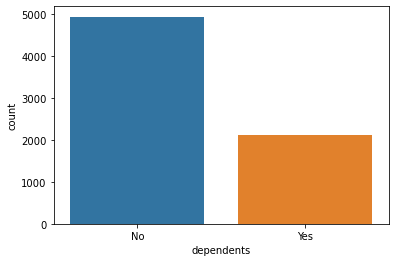

phoneservice


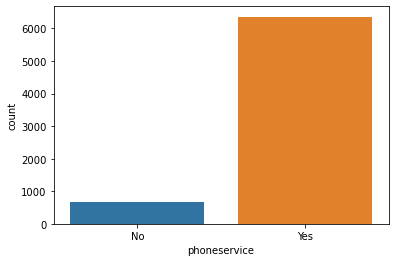

multiplelines


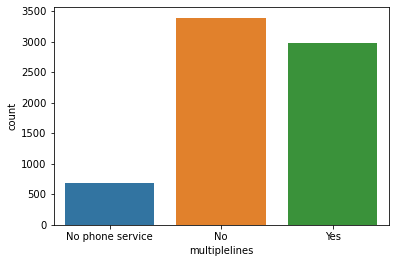

internetservice


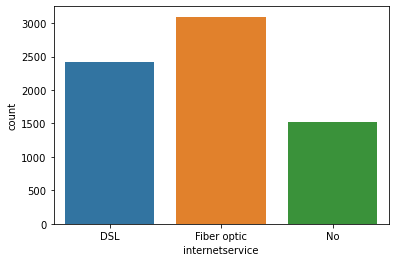

onlinesecurity


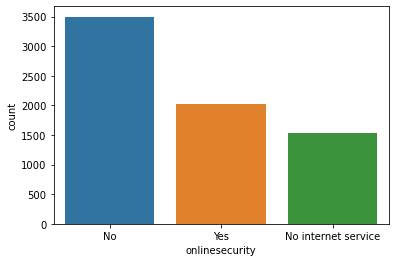

onlinebackup


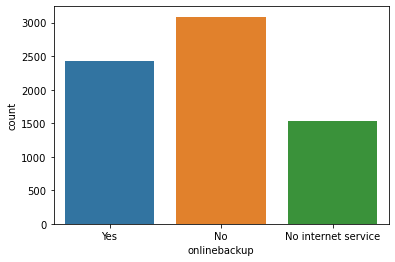

deviceprotection


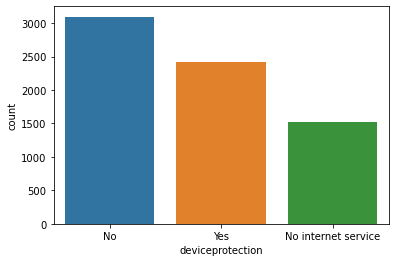

techsupport


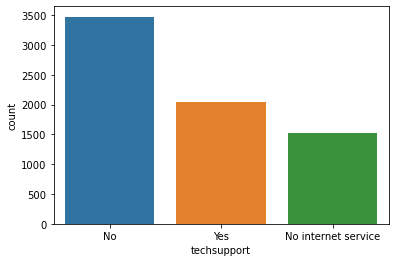

streamingtv


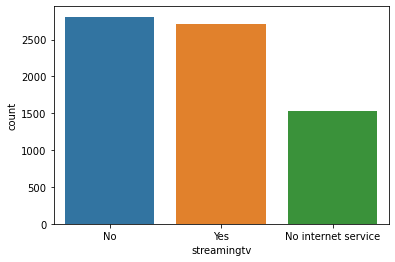

streamingmovies


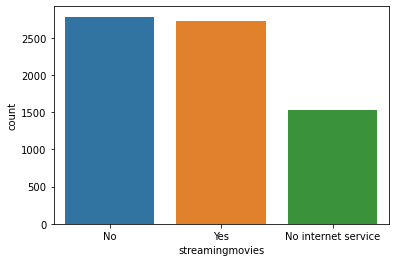

contract


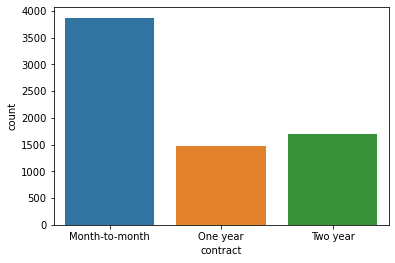

paperlessbilling


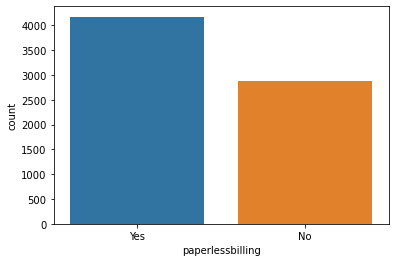

paymentmethod


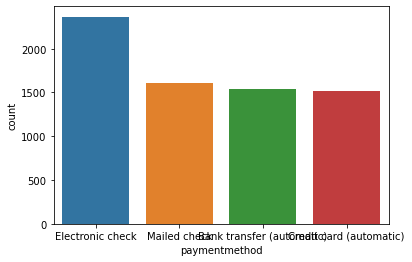

churn


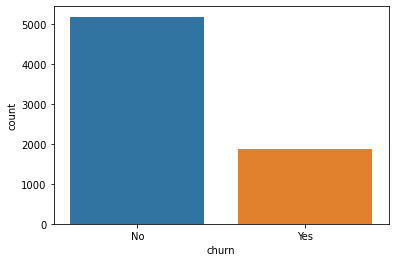

In [14]:
for col in df_new.select_dtypes("O").columns:
    # print(df_new[col].dtype)
    # print(df_new[col].nunique())
    if df_new[col].nunique() < 10:
        print(col)
        sns.countplot(data=df_new, x=col)
        plt.show()
        
    # print(col)
    # sns.countplot(col

In [15]:
df_new.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [38]:
df_new.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [39]:
df_new.internetservice.value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: internetservice, dtype: int64

In [46]:
df_new.internetservice.unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [ ]:
df_new.map(internet_map

In [16]:
master_map = {
    "Yes": 1,
    "No": 0,
    "No internet service": -1,
    "No phone service": -1
}

In [17]:
contract_map = {
    "Month-to-month": 0,
    "One year": 1,
    "Two year": 2
}

In [48]:
internet_map = {
    "DSL": 1,
    "Fiber optic": 2,
    "No": 0
}

In [49]:
pay_map = {
    'Mailed check': 1,
    'Electronic check': 2,
    'Bank transfer (automatic)': 3,
    'Credit card (automatic)': 4
}

In [50]:
gender_map = {
    "Male": 0,
    "Female": 1
}

In [51]:
df_model = (
    df_new.copy()
    .assign(
        contract=lambda x: x["contract"].map(contract_map),
        internetservice=lambda x: x["internetservice"].map(internet_map),
        paymentmethod=lambda x: x["paymentmethod"].map(pay_map),
        gender=lambda x: x["gender"].map(gender_map),
        totalcharges=lambda x: x["totalcharges"].replace({" ": 0}).astype(float)
    )
    .replace(master_map)
    .drop("customerid", axis=1)
 )

In [52]:
df_model.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,1,0,1,0,1,0,-1,1,0,1,0,0,0,0,0,1,2,29.85,29.85,0
1,0,0,0,0,34,1,0,1,1,0,1,0,0,0,1,0,1,56.95,1889.50,0
2,0,0,0,0,2,1,0,1,1,1,0,0,0,0,0,1,1,53.85,108.15,1
3,0,0,0,0,45,0,-1,1,1,0,1,1,0,0,1,0,3,42.30,1840.75,0
4,1,0,0,0,2,1,0,2,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [53]:
df_model.dtypes

gender                int64
seniorcitizen         int64
partner               int64
dependents            int64
tenure                int64
phoneservice          int64
multiplelines         int64
internetservice       int64
onlinesecurity        int64
onlinebackup          int64
deviceprotection      int64
techsupport           int64
streamingtv           int64
streamingmovies       int64
contract              int64
paperlessbilling      int64
paymentmethod         int64
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

In [54]:
df_model.isnull().sum()

gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X = df_model.copy()
y = X.pop("churn")

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [65]:
X_train.shape

(5634, 19)

In [66]:
y_train.shape

(5634,)

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
rfc = RandomForestClassifier()

In [69]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [72]:
y_hat = rfc.predict(X_test)

In [73]:
from sklearn.metrics import plot_confusion_matrix

/Users/james.helfrich/miniconda3/envs/churn/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


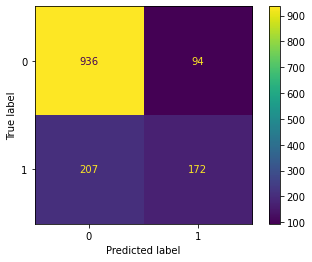

In [74]:
plot_confusion_matrix(rfc, X_test, y_test)  
plt.show()